In [54]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [55]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [56]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)          # no activation and no softmax at the end(included in nn.CrossEntropyLoss())
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [57]:
# Training the model

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        images = images.reshape(-1, 28*28).to(device)       # original shape: [100, 1, 28, 28], resized: [100, 784]
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.3046
Epoch [1/2], Step [200/600], Loss: 0.4279
Epoch [1/2], Step [300/600], Loss: 0.1966
Epoch [1/2], Step [400/600], Loss: 0.2114
Epoch [1/2], Step [500/600], Loss: 0.1233
Epoch [1/2], Step [600/600], Loss: 0.1703
Epoch [2/2], Step [100/600], Loss: 0.2510
Epoch [2/2], Step [200/600], Loss: 0.1718
Epoch [2/2], Step [300/600], Loss: 0.0399
Epoch [2/2], Step [400/600], Loss: 0.0611
Epoch [2/2], Step [500/600], Loss: 0.1249
Epoch [2/2], Step [600/600], Loss: 0.0709


In [62]:
# Testing the model

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predicted = torch.max(outputs.data, 1)           # max returns (value ,index)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print('Number of test samples: ',n_samples)
    print('Number of correct predictions: ', n_correct)
    print(f'Accuracy of the network on the {n_samples} test images: {acc} %')

Number of test samples:  10000
Number of correct predictions:  9705
Accuracy of the network on the 10000 test images: 97.05 %


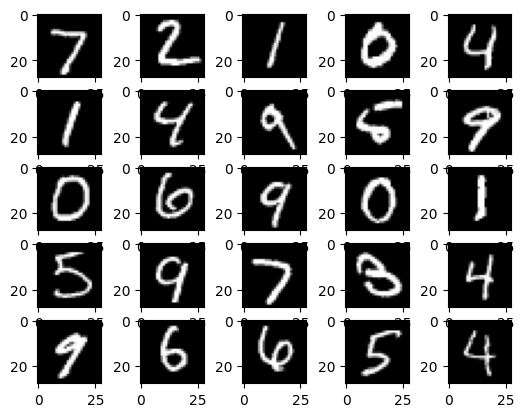

Predicted           Targets
7 2 1 0 4           7 2 1 0 4 
1 4 9 6 9           1 4 9 5 9 
0 6 9 0 1           0 6 9 0 1 
5 9 7 3 4           5 9 7 3 4 
9 6 6 5 4           9 6 6 5 4 


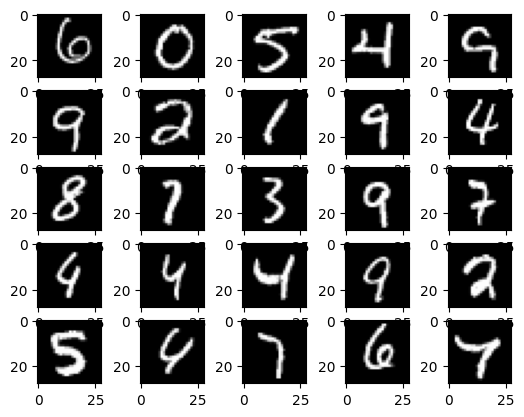

Predicted           Targets
6 0 5 4 9           6 0 5 4 9 
9 2 1 9 4           9 2 1 9 4 
8 7 3 9 7           8 7 3 9 7 
4 4 4 9 2           4 4 4 9 2 
5 4 7 6 7           5 4 7 6 7 


In [60]:
examples = iter(test_loader)
for batch_no in range(2):
    example_data, example_targets = next(examples)

    a = 5      # Number of rows
    b = 5      # Number of images in each row [a*b <= 100]

    for i in range(a*b):
        plt.subplot(a,b,i+1)
        plt.imshow(example_data[i][0], cmap='gray')

    plt.show()    

    example_data = example_data.reshape(-1, 28*28).to(device)
    example_targets = example_targets.to(device)
    outputs2 = model(example_data)
    _2, predicted2 = torch.max(outputs2.data, 1)

    print("Predicted"+b*'  ',"Targets")
    for i in range(a):
        for j in range(b):
            print(predicted2[b*i+j].item(),end=' ')
        print(10*' ',end='')
        for j in range(b):
            print(example_targets[b*i+j].item(),end=' ')
        print()